In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.tree import DecisionTreeClassifier

In [286]:
df = pd.read_csv(r'C:\Users\rodri\GitHub\My_Projects\1 Aulas Data Science\Data Sets/sms-spam-collection-dataset.zip',encoding='latin-1')
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)                   
df = df.rename(columns = {'v1': "label", 'v2': 'text'})                                  
df.head(12)                           

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


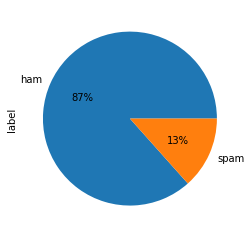

In [287]:
df['label'].value_counts().plot(kind='pie', autopct='%1.0f%%');

In [288]:
df['label'] = df.label.map({'ham':0, 'spam':1})

In [289]:
df.sort_values('label', ascending=False, inplace=True)

In [290]:
df.drop(df.index[:230], inplace=True)

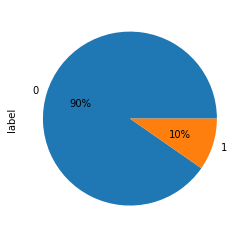

In [291]:
df['label'].value_counts().plot(kind='pie', autopct='%1.0f%%');

In [292]:
# Separação em teste e treino
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], 
                                                    test_size=0.33, random_state=42, stratify=df['label'])

In [293]:
#Criando nosso super modelo
def classificador_burro(x):
    y_pred = x.copy()
    return y_pred.map({0:0, 1:0})

In [294]:
y_pred = classificador_burro(y_test)

## Métricas:


In [295]:
from sklearn.metrics import accuracy_score, classification_report, \
                            confusion_matrix, recall_score, precision_score, \
                            f1_score, auc, roc_auc_score, roc_curve

In [296]:
print('Acuracidade do modelo: ',round(accuracy_score(y_pred,y_test)*100,2), '%')

Acuracidade do modelo:  90.3 %


In [304]:
print('Demais Indicadores: \n')

print('   recall_score: ',round(recall_score(y_pred,y_test),2))
print('   precision_score: ',round(precision_score(y_pred,y_test),2))
print('   f1_score: ',round(f1_score(y_pred,y_test),2))
try:
    print('   roc: ',round(roc_auc_score(y_pred,y_test),2))
except:
    print('   ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.')

Demais Indicadores: 

   recall_score:  0.0
   precision_score:  0.0
   f1_score:  0.0
   ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.


C:\Users\rodri\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\rodri\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


In [305]:
print(confusion_matrix(y_pred,y_test))

[[1592  171]
 [   0    0]]


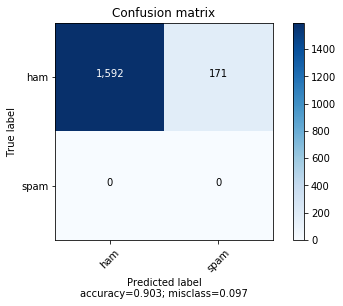

In [306]:
plot_confusion_matrix(confusion_matrix(y_pred,y_test),target_names=['ham','spam'])

In [307]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      1763
           1       0.00      0.00      0.00         0

   micro avg       0.90      0.90      0.90      1763
   macro avg       0.50      0.45      0.47      1763
weighted avg       1.00      0.90      0.95      1763



C:\Users\rodri\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\rodri\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\rodri\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## Agora vamos tentar com um modelo simples

In [310]:
%%time

# CountVectorizer object
vectorizer = CountVectorizer(lowercase=True)

# Fit_transform X_train
X_train_bow = vectorizer.fit_transform(X_train)

# Transform X_test
X_test_bow = vectorizer.transform(X_test)

# Modelo simples
model = DecisionTreeClassifier(max_depth=1, splitter='random', random_state=1)


# Fit do modelo
model.fit(X_train_bow, y_train)

# Predições
y_pred = model.predict(X_test_bow)

Wall time: 92.8 ms


In [311]:
print('Acuracidade do modelo: ',round(accuracy_score(y_pred,y_test)*100,2), '%')

Acuracidade do modelo:  90.47 %


In [313]:
print('Demais Indicadores: \n')

print('   recall_score: ',round(recall_score(y_pred,y_test),2))
print('   precision_score: ',round(precision_score(y_pred,y_test),2))
print('   f1_score: ',round(f1_score(y_pred,y_test),2))
print('   roc: ',round(roc_auc_score(y_pred,y_test),2))

Demais Indicadores: 

   recall_score:  0.51
   precision_score:  0.46
   f1_score:  0.48
   roc:  0.73


In [314]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1608
           1       0.46      0.51      0.48       155

   micro avg       0.90      0.90      0.90      1763
   macro avg       0.71      0.73      0.72      1763
weighted avg       0.91      0.90      0.91      1763



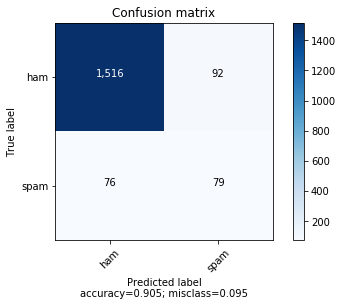

In [315]:
plot_confusion_matrix(confusion_matrix(y_pred,y_test),target_names=['ham','spam'])

AUC: 0.707


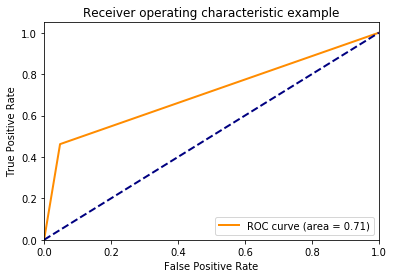

In [316]:
# predict probabilities
probs = model.predict_proba(X_test_bow)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [77]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix'):
    
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    cmap = plt.get_cmap('Blues')
    plt.rcParams.update(plt.rcParamsDefault)
    %matplotlib inline
    
    #plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
        
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.3f}; misclass={:0.3f}'.format(accuracy, misclass))
    plt.show()